In [1]:
%pylab inline

import zap_util as z

import statsmodels.api as sm
import statsmodels.formula.api as smf
rmse = {}
z.set_style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = z.get_imoveis_dataframe(False)


In [3]:
df2 = df[df.bairro_g == 'Meier']
var_ignore = ['bairro_g']
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: id_bairro_g,bairro_g,preco,m2


Fórmula: df2.preco  ~ df2.dm_esquina + C(df2.quartos) + df2.dm_closet + df2.dist_saude_privada + df2.dm_armario + df2.se_anos_estudo + df2.dm_recuado + df2.dm_fundos + df2.dm_andar_alto + df2.dm_mezanino + df2.dm_piscina + df2.dm_playground + df2.dist_centro_lng + df2.dm_hidrometro + df2.lng + df2.dm_seguranca + df2.dist_trem + df2.dist_lagoa + C(df2.suites) + df2.dm_sol_da_manha + df2.area + df2.dm_frente + df2.dist_delegacia + df2.dist_centro_lat + df2.dm_blindex + df2.dist_favela + df2.dist_logradouro + df2.dm_terraco + df2.dm_salao_de_jogos + df2.se_idh + df2.dist_centro + df2.dm_sala_de_jantar + df2.dm_dependencia + df2.se_crm_violento + df2.dm_estacionamento_visitantes + df2.dm_banheira + df2.dist_saude_publica + df2.dist_bombeiro + df2.dm_jardim + C(df2.garagem) + df2.dist_praia + df2.dm_duplex + df2.dm_andar_inteiro + df2.dm_sol_da_tarde + df2.condominio + df2.lat + df2.dm_varanda + df2.dm_triplex + df2.dm_children_care + df2

In [4]:
lm = sm.formula.ols(f, df2).fit()
rmse['default'] = z.rmse(lm.resid)
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     44.81
Date:                Sat, 04 Apr 2015   Prob (F-statistic):          3.85e-178
Time:                        18:07:13   Log-Likelihood:                -3521.3
No. Observations:                 621   AIC:                             7169.
Df Residuals:                     558   BIC:                             7448.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

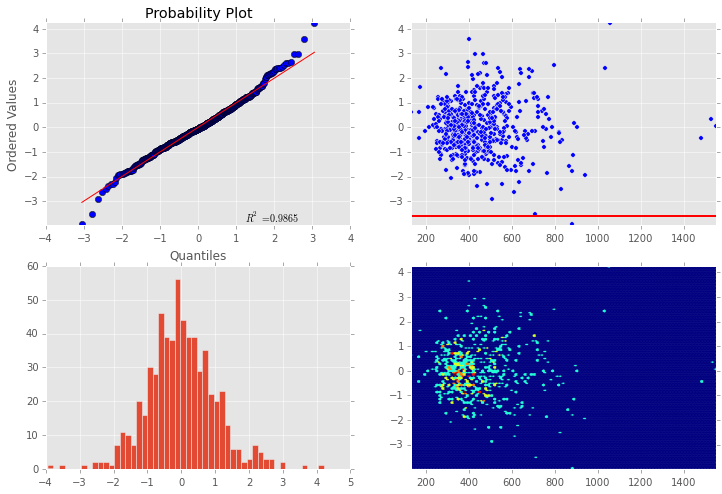

In [5]:
z.plot_residual(lm)

In [6]:
z.print_autocorr(df,['id_bairro_g'])

Coluna               | Autocorrelacionada com                            
se_anos_estudo       : ['se_idh(0.95)', 'se_renda(0.87)', 'se_perc_alfabetizacao(0.89)']
dm_frente            : ['dm_varanda(0.70)', 'dm_salao_de_festas(0.73)']  
dist_delegacia       : ['dist_centro(0.82)', 'dist_metro(0.87)']         
dist_centro_lng      : ['lng(-1.00)', 'dist_delegacia(0.79)', 'dist_centro(0.97)', 'se_saneamento(-0.80)', 'dist_metro(0.92)']
preco                : ['area(0.71)', 'm2(0.71)']                        
se_saneamento        : ['dist_metro(-0.79)']                             
lng                  : ['dist_delegacia(-0.79)', 'dist_centro(-0.97)', 'se_saneamento(0.80)', 'dist_metro(-0.92)']
dist_centro          : ['se_saneamento(-0.79)', 'dist_metro(0.96)']      
se_idh               : ['se_renda(0.77)', 'se_perc_alfabetizacao(0.89)'] 
dist_trem            : ['dist_delegacia(0.74)', 'dist_centro_lat(0.91)', 'dist_centro(0.71)', 'lat(-0.80)', 'dist_metro(0.79)']
dist_lagoa           : 

In [7]:
var_ignore += ['id_bairro_g', 'se_anos_estudo','dm_piscina', 'dist_lagoa', 
    'dm_frente','dist_centro_lat','dist_centro_lng','dist_delegacia',
    'se_idh','preco','m2','dist_metro','dist_trem','dist_centro',
    'se_saneamento',]
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [8]:
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: se_anos_estudo,preco,dm_piscina,bairro_g,dist_centro_lat,dist_trem,dist_lagoa,dm_frente,dist_delegacia,dist_centro_lng,m2,id_bairro_g,se_saneamento,se_idh,dist_centro,dist_metro


Fórmula: df2.preco  ~ df2.dm_esquina + C(df2.quartos) + df2.dm_closet + C(df2.suites) + df2.dm_armario + df2.se_crm_violento + df2.dm_recuado + df2.dm_fundos + df2.dm_andar_alto + df2.dm_mezanino + df2.dm_playground + df2.dm_hidrometro + df2.lng + df2.dm_seguranca + df2.se_renda + df2.dm_sol_da_manha + df2.area + df2.dist_saude_privada + df2.dm_linear + df2.dm_blindex + df2.dist_favela + df2.dist_logradouro + df2.dm_terraco + df2.dm_salao_de_jogos + df2.dm_andar_inteiro + df2.dm_sala_de_jantar + df2.dm_dependencia + df2.dm_estacionamento_visitantes + df2.dm_banheira + df2.dist_saude_publica + df2.dist_bombeiro + df2.dm_jardim + C(df2.garagem) + df2.dist_praia + df2.dm_duplex + df2.dm_sol_da_tarde + df2.condominio + df2.lat + df2.dm_varanda + df2.dm_triplex + df2.dm_children_care + df2.dm_

In [9]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_autocorr'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     47.67
Date:                Sat, 04 Apr 2015   Prob (F-statistic):          6.96e-176
Time:                        18:07:16   Log-Likelihood:                -3544.6
No. Observations:                 621   AIC:                             7199.
Df Residuals:                     566   BIC:                             7443.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [10]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
#bp.index = [i.replace('C(df.bairro_g)[T.', '').replace(']','')  for i in bp.index.tolist()]
c = plow > 0.05
plow = plow[c]
plow

Intercept                     0.633583
C(df2.suites)[T.2.0]          0.175571
df2.dm_esquina                0.528091
df2.dm_closet                 0.311618
df2.dm_armario                0.682044
df2.se_crm_violento           0.633583
df2.dm_recuado                0.871129
df2.dm_fundos                 0.922058
df2.dm_andar_alto             0.633583
df2.dm_mezanino               0.473140
df2.dm_playground             0.796607
df2.dm_hidrometro             0.552413
df2.lng                       0.091186
df2.dm_seguranca              0.168789
df2.se_renda                  0.633583
df2.dm_sol_da_manha           0.449740
df2.dist_saude_privada        0.692526
df2.dm_linear                 0.633583
df2.dm_blindex                0.599661
df2.dist_favela               0.091779
df2.dist_logradouro           0.343749
df2.dm_terraco                0.901483
df2.dm_salao_de_jogos         0.242513
df2.dm_andar_inteiro          0.064006
df2.dm_sala_de_jantar         0.932649
df2.dm_dependencia       

In [11]:
# Remover parâmetros sem significância.
var_ignore_too = map(lambda x: x.replace('df2.',''), plow.index.tolist())
var_ignore += var_ignore_too 

In [12]:
z.print_autocorr(df, var_ignore)

Não há colunas autocorrelacionadas.


In [13]:
f,_,e = z.prep_formula(df2,'df2', cat=['suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_closet,dist_saude_privada,dm_armario,se_crm_violento,dm_playground,dm_hidrometro,dm_children_care,C(suites)[T.2.0],dm_frente,dist_delegacia,dist_logradouro,dm_terraco,m2,dm_salao_de_jogos,dist_centro,dist_praia,se_renda,dm_varanda,se_crm_roubo,dm_quarto_de_empregada,dm_copa,se_perc_alfabetizacao,dm_quadra,dm_sauna,dm_andar_baixo,dm_sol_da_manha,se_anos_estudo,dm_recuado,dm_fundos,dm_andar_alto,dm_mezanino,preco,dm_piscina,lng,dm_seguranca,dist_trem,dist_lagoa,dm_linear,dm_blindex,dist_favela,Intercept,id_bairro_g,bairro_g,se_idh,dm_sala_de_jantar,dm_dependencia,dm_banheira,dist_saude_publica,dist_bombeiro,dm_jardim,dm_duplex,lat,dist_centro_lat,dm_triplex,dm_andar_inteiro,dm_lateral_,dm_portaria,dm_indevassavel,dm_cobertura,dist_centro_lng,dm_esquina,se_saneamento,dist_metro,dm_elevador_privativo


Fórmula: df2.preco  ~ C(df2.suites) + C(df2.quartos) + df2.dm_estacionamento_visitantes + df2.area + df2.dm_salao_de_festas + df2.dm_sol_da_tarde + C(df2.garagem) + d

In [14]:
lm = sm.formula.ols(f, df2).fit()
rmse['w_unsignif_1'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              df2.preco   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sat, 04 Apr 2015   Prob (F-statistic):          1.36e-194
Time:                        18:07:16   Log-Likelihood:                -3589.5
No. Observations:                 621   AIC:                             7211.
Df Residuals:                     605   BIC:                             7282.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercep

In [15]:
# Lista de parâmetros sem significância.
plow = lm.pvalues.copy()
c = plow > 0.05
plow = plow[c]
plow

C(df2.suites)[T.2.0]    0.069036
df2.dm_churrasqueira    0.067877
dtype: float64

In [16]:
# Remover parâmetros sem significância.

# Encontrar variáveis que não são bairros.
var_ignore_too = map(lambda x: x.replace('df.',''), plow.index.tolist())
var_ignore_too = var_ignore_too[1:]
var_ignore = var_ignore + var_ignore_too

In [17]:
f,_,e = z.prep_formula(df,'df', cat=['bairro_g','suites','quartos','garagem'],ignore=var_ignore)
print('Variáveis excluídas: ' + ','.join(e))
print( '\n')
print('Fórmula: '+ f)

Variáveis excluídas: dm_closet,dist_saude_privada,dm_armario,se_crm_violento,dm_playground,dm_hidrometro,dm_children_care,C(suites)[T.2.0],dm_frente,dist_delegacia,dist_logradouro,dm_terraco,m2,dm_salao_de_jogos,dist_centro,dist_praia,se_renda,dm_varanda,se_crm_roubo,dm_quarto_de_empregada,dm_copa,df2.dm_churrasqueira,dm_quadra,dm_sauna,se_perc_alfabetizacao,dm_andar_baixo,dm_sol_da_manha,se_anos_estudo,dm_recuado,dm_fundos,dm_andar_alto,dm_mezanino,preco,dm_piscina,lng,dm_seguranca,dist_trem,dist_lagoa,dm_linear,dm_blindex,dist_favela,Intercept,id_bairro_g,bairro_g,se_idh,dm_sala_de_jantar,dm_dependencia,dm_banheira,dist_saude_publica,dist_bombeiro,dm_jardim,dm_duplex,lat,dist_centro_lat,dm_triplex,dm_andar_inteiro,dm_lateral_,dm_portaria,dm_indevassavel,dm_cobertura,dist_centro_lng,dm_esquina,se_saneamento,dist_metro,dm_elevador_privativo


Fórmula: df.preco  ~ C(df.suites) + C(df.quartos) + df.dm_estacionamento_visitantes + df.area + df.dm_salao_de_festas + df.dm_sol_da_tarde + C(df

In [18]:
lm = sm.formula.ols(f, df).fit()
rmse['w_unsignif_2'] = z.rmse(lm.resid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               df.preco   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     4337.
Date:                Sat, 04 Apr 2015   Prob (F-statistic):               0.00
Time:                        18:07:17   Log-Likelihood:            -4.1343e+05
No. Observations:               53581   AIC:                         8.269e+05
Df Residuals:                   53563   BIC:                         8.271e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept 

# Determinar se a Regresssão média simples é o melhor método.

In [25]:
modelo_ml = z.rmse(lm.resid)
modelo_media = z.rmse(df2.preco-df2.preco.mean())
if modelo_rl < modelo_media :
    print 'REGRESSAO WINS por {:.2f}%'.format((1-modelo_rl/modelo_media)*100)
else:
    print 'MEDIA WINS por {:.2f}%'.format((1-modelo_media/modelo_ml)*100)

MEDIA WINS por 68.38%


In [26]:
 modelo_rl , modelo_media

(543.00356161841046, 171.67681925313934)

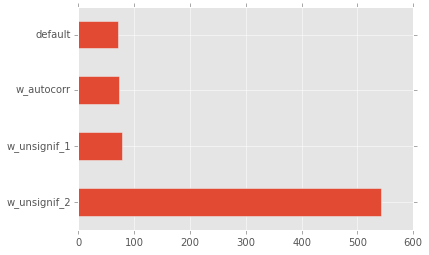

In [27]:
srmse = z.pd.Series(data=rmse.values(),index=rmse.keys())
srmse.sort(ascending=False)
srmse.plot(kind='barh');